# Criando um Modelo no Keras

## Passos
- Especificação da Arquitetura
- Compilação
- Fit
- Predict

# Especificação do Modelo

In [1]:
import numpy as np

In [2]:
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
from keras.models import Sequential

In [ ]:
predictors = np.loadtxt('predictors_data.csv', delimiter=',')

In [ ]:
n_cols = predictors.shape[1]

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))

In [ ]:
model.add(Dense(100, activation='relu'))

In [ ]:
model.add(Dense(1))

# É necessário compilar o modelo
- Especificar o otimizador
    - Muitas opções 
    - `Adam` é usualmente uma boa escolha
- Loss Function
    - `mea_squared_error` é comúm para regressão

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit
- Aplicando backpropagation e gradient descent com seus dados para atualizar os pesos
- Normalizar os dados antes do Fit pode facilitar a otimização

In [ ]:
 model.fit(predictors, target)

# Para modelos de Classificação

- `categorical_crossentropy` loss function
- Quanto menor melhor
- Adicionar `metrics=['accuracy'] ao passo de compilação para diagnósticos mais fáceis de entender
- Camada de saída possui um nó separado para cada resultado possível, e usa `softmax` para ativação

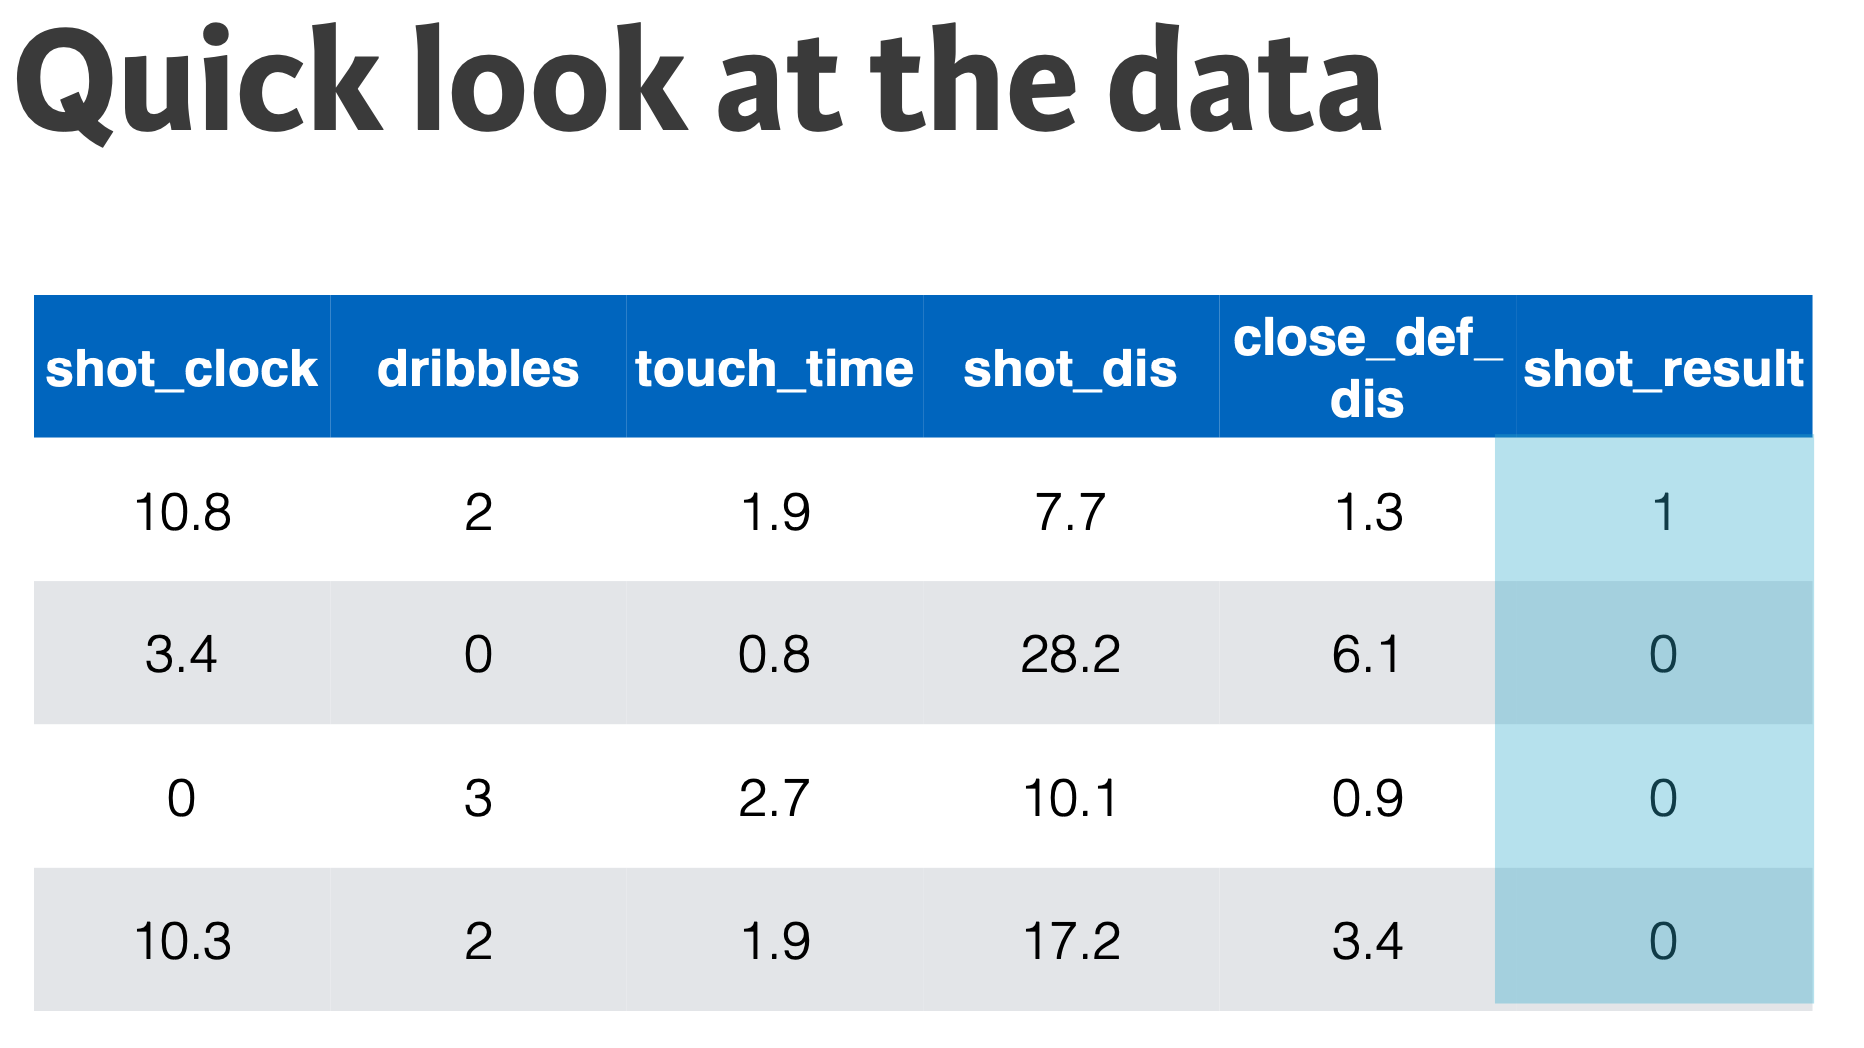

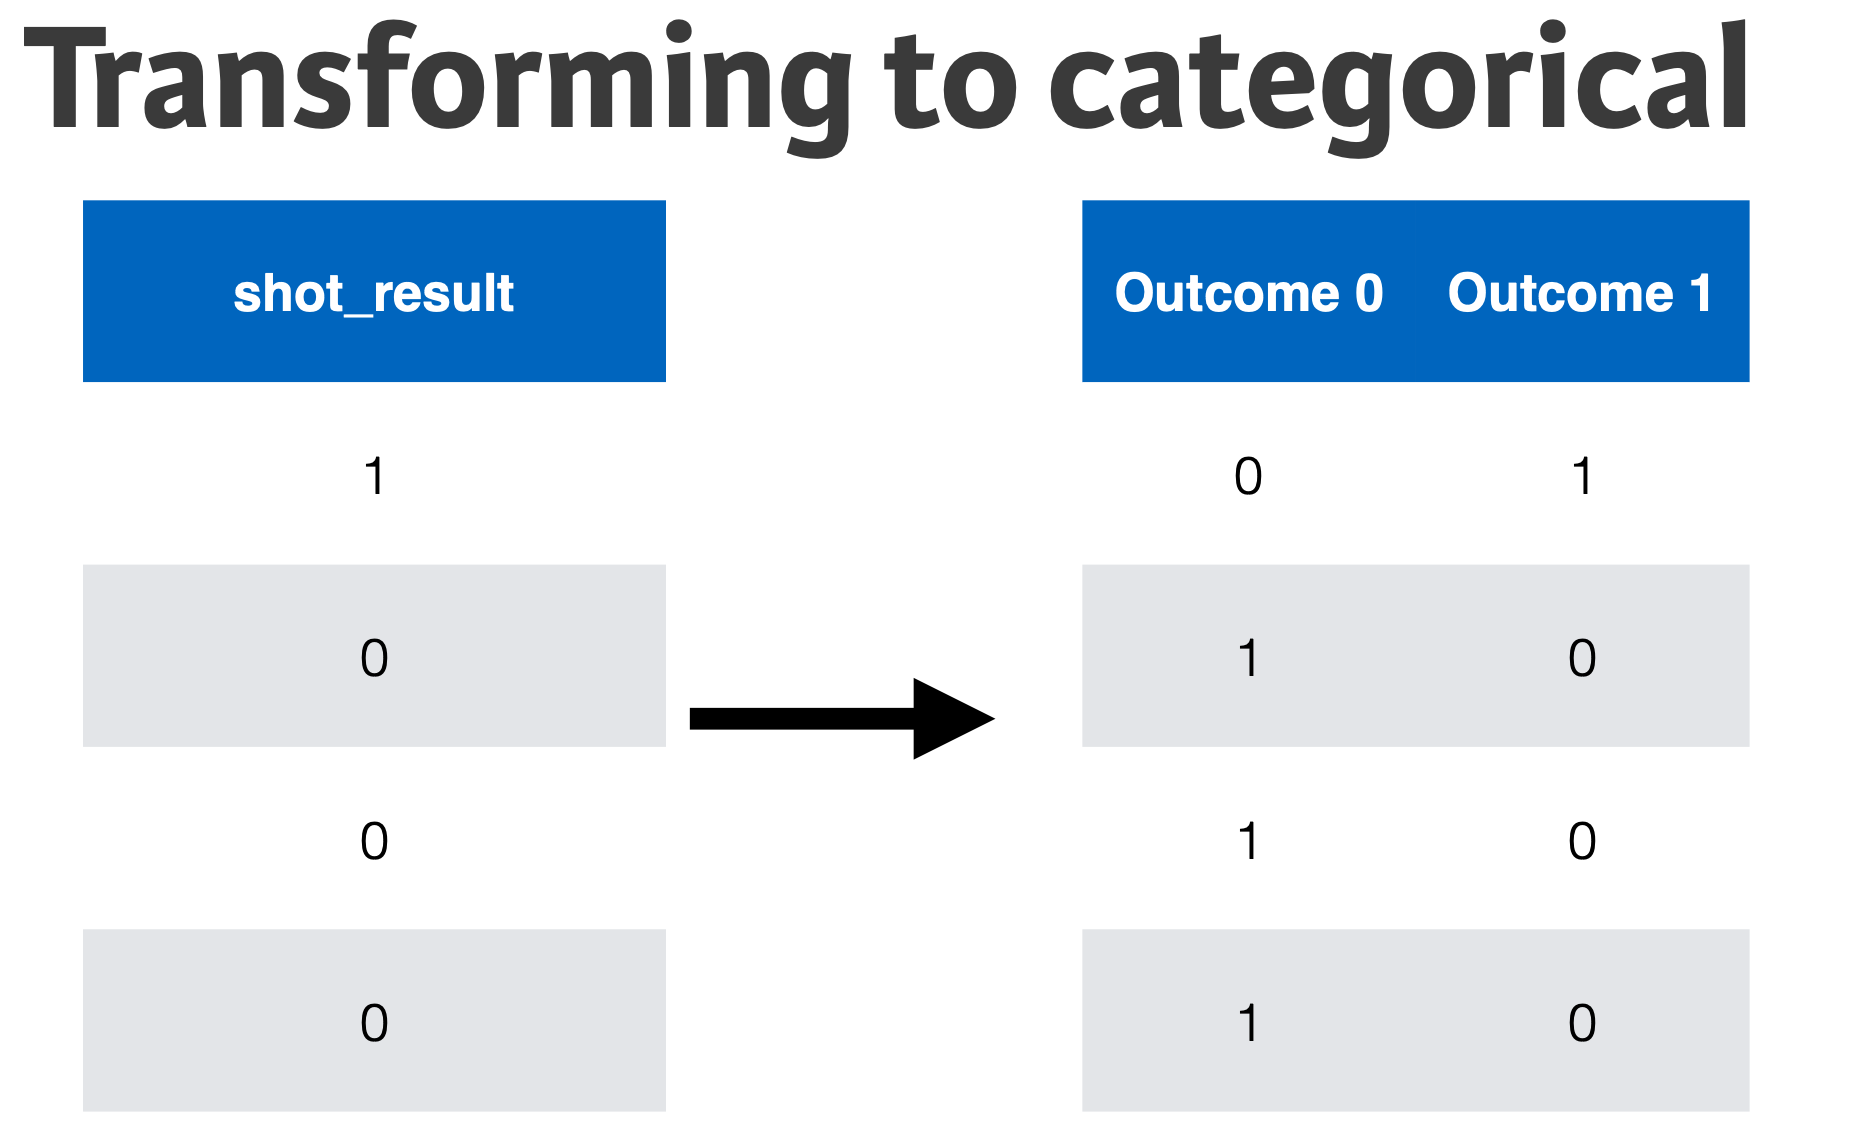

In [1]:
import numpy as np

In [2]:
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
from keras.models import Sequential

In [4]:
from keras.utils import to_categorical

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('/Users/marcosdeoliveira/shot_logs.csv')

In [7]:
data

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [8]:
predictors = data[['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]

In [9]:
predictors

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST
0,10.8,2,1.9,7.7,1.3
1,3.4,0,0.8,28.2,6.1
2,NaN,3,2.7,10.1,0.9
3,10.3,2,1.9,17.2,3.4
4,10.9,2,2.7,3.7,1.1
...,...,...,...,...,...
128064,18.3,5,6.2,8.7,0.8
128065,19.8,4,5.2,0.6,0.6
128066,23.0,2,4.2,16.9,4.2
128067,9.1,4,4.5,18.3,3.0


In [10]:
data[['SHOT_RESULT']]

,SHOT_RESULT
0,made
1,missed
2,missed
3,missed
4,missed
...,...
128064,missed
128065,made
128066,made
128067,missed


In [11]:
data = (data[['SHOT_RESULT']] == 'made') * 1

In [12]:
data

,SHOT_RESULT
0,1
1,0
2,0
3,0
4,0
...,...
128064,0
128065,1
128066,1
128067,0


In [13]:
target = to_categorical(data.SHOT_RESULT)

In [14]:
target

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [15]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 5 columns):
SHOT_CLOCK        122502 non-null float64
DRIBBLES          128069 non-null int64
TOUCH_TIME        128069 non-null float64
SHOT_DIST         128069 non-null float64
CLOSE_DEF_DIST    128069 non-null float64
dtypes: float64(4), int64(1)
memory usage: 4.9 MB


In [16]:
prep = predictors[:][predictors['SHOT_CLOCK'].isna()==False]

In [17]:
media = prep[['SHOT_CLOCK']].mean()

In [18]:
media

SHOT_CLOCK    12.453344
dtype: float64

In [19]:
predictors[['SHOT_CLOCK']] = predictors[['SHOT_CLOCK']].replace(np.nan, media)

/Users/marcosdeoliveira/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
predictors

,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST
0,10.800000,2,1.9,7.7,1.3
1,3.400000,0,0.8,28.2,6.1
2,12.453344,3,2.7,10.1,0.9
3,10.300000,2,1.9,17.2,3.4
4,10.900000,2,2.7,3.7,1.1
...,...,...,...,...,...
128064,18.300000,5,6.2,8.7,0.8
128065,19.800000,4,5.2,0.6,0.6
128066,23.000000,2,4.2,16.9,4.2
128067,9.100000,4,4.5,18.3,3.0


In [21]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 5 columns):
SHOT_CLOCK        128069 non-null float64
DRIBBLES          128069 non-null int64
TOUCH_TIME        128069 non-null float64
SHOT_DIST         128069 non-null float64
CLOSE_DEF_DIST    128069 non-null float64
dtypes: float64(4), int64(1)
memory usage: 4.9 MB


In [22]:
n_cols = predictors.shape[1]

In [23]:
model = Sequential()

In [24]:
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))

In [25]:
model.add(Dense(100, activation='relu'))

In [26]:
model.add(Dense(100, activation='relu'))

In [27]:
model.add(Dense(2, activation='softmax'))

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(predictors, target)

Epoch 1/1
128069/128069 [==============================] - 19s 145us/step - loss: 0.6580 - accuracy: 0.6133


# Usando modelos criados anteiormente
- Save
- Reload
- Make predictions

In [30]:
from keras.models import load_model

In [31]:
model.save('model_file.h5')

In [ ]:
my_model = load_model('my_model.h5')

In [ ]:
predictions = my_model.predict(data_to_predict_with)

In [ ]:
probability_true = predictions[:,1]

# Verificando a estrutura do modelo

In [ ]:
my_model.summary()